# Visualizacion

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Relaciones-entre-variables-cuantitativas" data-toc-modified-id="Relaciones-entre-variables-cuantitativas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Relaciones entre variables cuantitativas</a></span><ul class="toc-item"><li><span><a href="#Scatter-plot" data-toc-modified-id="Scatter-plot-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Scatter plot</a></span></li><li><span><a href="#Plot-con-2-ejes-Y" data-toc-modified-id="Plot-con-2-ejes-Y-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot con 2 ejes Y</a></span></li></ul></li><li><span><a href="#Distribución-de-los-datos" data-toc-modified-id="Distribución-de-los-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Distribución de los datos</a></span><ul class="toc-item"><li><span><a href="#Histograma" data-toc-modified-id="Histograma-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Histograma</a></span></li><li><span><a href="#Density-plot" data-toc-modified-id="Density-plot-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Density plot</a></span></li></ul></li><li><span><a href="#Comparar-grupos/categorías" data-toc-modified-id="Comparar-grupos/categorías-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparar grupos/categorías</a></span><ul class="toc-item"><li><span><a href="#Diagrama-de-barras" data-toc-modified-id="Diagrama-de-barras-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Diagrama de barras</a></span></li><li><span><a href="#Diagrama-de-barras-apilado" data-toc-modified-id="Diagrama-de-barras-apilado-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Diagrama de barras apilado</a></span></li><li><span><a href="#Diagrama-de-barras-agrupado" data-toc-modified-id="Diagrama-de-barras-agrupado-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Diagrama de barras agrupado</a></span></li><li><span><a href="#Boxplots" data-toc-modified-id="Boxplots-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Boxplots</a></span></li></ul></li></ul></div>

# Matplotlib - Representación de datos

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

En este notebook veremos diferentes formas de representar variables con tal de extraer información de los datos a partir de su representación gráfica.

In [3]:
path ="/home/bigdatafutura/Sesion 03/files/Bike-Sharing-Dataset-day.csv"

Data Wrangling

In [4]:
data = pd.read_csv(path)
data.head(3)
columns = ["dteday", "weekday", "temp", "windspeed", "casual","registered", "cnt"]
data = data[columns]
data["dteday"] = pd.to_datetime(data["dteday"])

## Relaciones entre variables cuantitativas

### Scatter plot

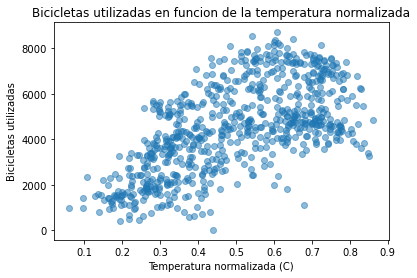

In [5]:
plt.scatter(data['temp'], data['cnt'], alpha=0.5)
plt.xlabel('Temperatura normalizada (C)')
plt.ylabel('Bicicletas utilizadas')
plt.title('Bicicletas utilizadas en funcion de la temperatura normalizada')
plt.show()

### Plot con 2 ejes Y

Este tipo de gráfica resulta muy útil cuando se quieren comparar dos variables cuantitativas en función de una tercera variable pero las dos tienen escalas muy distintas.

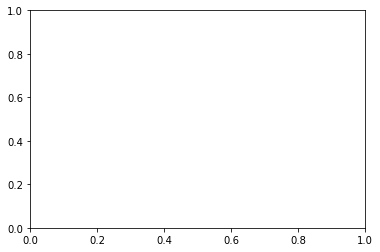

In [6]:
axes = plt.subplot()

In [7]:
axes

<AxesSubplot:>

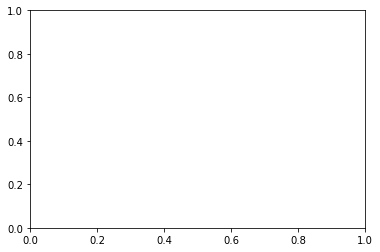

In [8]:
_, axes1 = plt.subplots()

In [9]:
axes1

<AxesSubplot:>

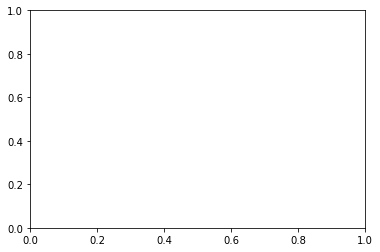

In [10]:
axes1 = plt.subplots()

In [11]:
axes1

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

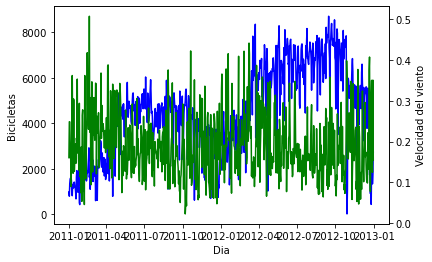

In [12]:
_, axes1 = plt.subplots()
axes1.plot(data["dteday"], data["cnt"], c="b")

axes1.set_ylabel("Bicicletas")
axes1.set_xlabel("Dia")

axes2 = axes1.twinx()
axes2.plot(data["dteday"], data["windspeed"], c="g")
axes2.set_ylabel("Velocidad del viento")

plt.show()

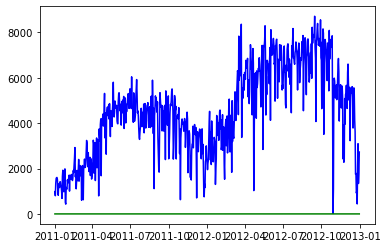

In [13]:
plt.plot(data["dteday"], data["cnt"], c="b")
plt.plot(data["dteday"], data["windspeed"], c="g")

plt.show()

## Distribución de los datos

### Histograma

Muy útiles para ver la distribución de una variable cuantitative a grandes rasgos.

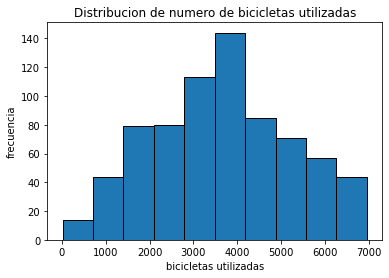

In [14]:
plt.hist(data['registered'], ec='black')
plt.xlabel('bicicletas utilizadas')
plt.ylabel('frecuencia')
plt.title('Distribucion de numero de bicicletas utilizadas')
plt.show()

También se pueden crear dos histogramas en uno con tal de comparar dos distribuciones.

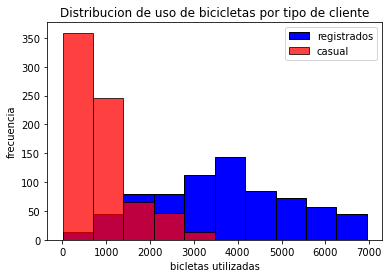

In [15]:
#se fijan los bins para que sean los mismos para ambos histogramas
import numpy as np

max_nbins = 10
data_range = [min(min(data['registered']), min(data['casual'])), max(max(data['registered']), max(data['casual']))]
binwidth = (data_range[1] - data_range[0]) / max_nbins
bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)

plt.hist(data['registered'], bins=bins, color='b', alpha=1, label='registrados', ec='black')
plt.hist(data['casual'], bins=bins, color='r', alpha=0.75, label = 'casual', ec='black')

plt.xlabel('bicletas utilizadas')
plt.ylabel('frecuencia')
plt.title('Distribucion de uso de bicicletas por tipo de cliente')
plt.legend(loc='best')
plt.show()

### Density plot

Método más rigusoso para determinar la forma de la distribución de los datos.

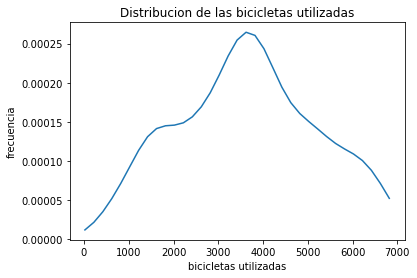

In [16]:
# El primer paso es estimar la función de densidad de probabilidad de los datos en cuestión
from scipy.stats import gaussian_kde

density_est = gaussian_kde(data['registered'])


# Crear datos ordenados 
x_data = np.arange(min(data['registered']), max(data['registered']), 200)

plt.plot(x_data, density_est(x_data))
plt.xlabel('bicicletas utilizadas')
plt.ylabel('frecuencia')
plt.title('Distribucion de las bicicletas utilizadas')
plt.show()

## Comparar grupos/categorías

### Diagrama de barras

Para entender mejor el comportamiento de las variables categóricas, resulta útil añadir barras de error. 

In [17]:
mean_total_co_day = data[['weekday', 'cnt']].groupby('weekday').agg([np.mean, np.std])

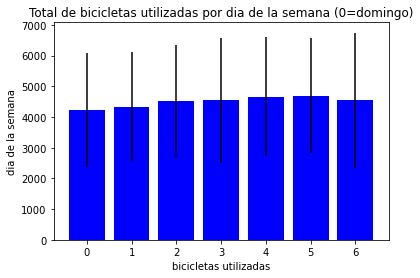

In [18]:
# Calcular la media y desviación estándard para el número de bicicletas utilizadas cada día

mean_total_co_day = data[['weekday', 'cnt']].groupby('weekday').agg([np.mean, np.std])
mean_total_co_day.columns = mean_total_co_day.columns.droplevel()

_, ax = plt.subplots()
ax.bar(mean_total_co_day.index.values, mean_total_co_day['mean'], color = 'b', align = 'center')
# Añadir los errores. El parámetro ls se pone a 'none' para que no haya una línea entre las distintas barras
ax.errorbar(mean_total_co_day.index.values, mean_total_co_day['mean'],ls= 'none', yerr = mean_total_co_day['std'], color = 'black', capthick = 2)
ax.set_ylabel('dia de la semana')
ax.set_xlabel('bicicletas utilizadas')
ax.set_title('Total de bicicletas utilizadas por dia de la semana (0=domingo)')
plt.show()


In [19]:
ax.errorbar?

Signature:
ax.errorbar(
    x,
    y,
    yerr=None,
    xerr=None,
    fmt='',
    ecolor=None,
    elinewidth=None,
    capsize=None,
    barsabove=False,
    lolims=False,
    uplims=False,
    xlolims=False,
    xuplims=False,
    errorevery=1,
    capthick=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot y versus x as lines and/or markers with attached errorbars.

*x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
sizes. By default, this draws the data markers/lines as well the
errorbars. Use fmt='none' to draw errorbars without any data markers.

Parameters
----------
x, y : float or array-like
    The data positions.

xerr, yerr : float or array-like, shape(N,) or shape(2, N), optional
    The errorbar sizes:

    - scalar: Symmetric +/- values for all data points.
    - shape(N,): Symmetric +/-values for each data point.
    - shape(2, N): Separate - and + values for each bar. First row
      contains the lower errors, the second row contains the 

### Diagrama de barras apilado

Resultan especialmente útiles para comparar proporciones entre categorías. 

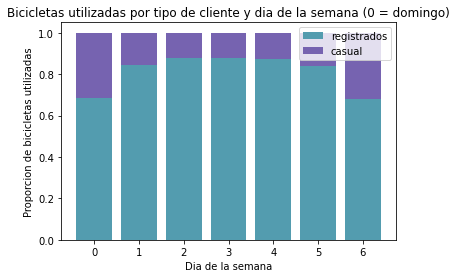

In [20]:
# Ejemplo con el número medio de bicicletas utilizadas por día de semana y tipo de cliente

mean_by_reg_co_day = data[['weekday', 'registered', 'casual']].groupby('weekday').mean()

#Calcular la proporción de cada tipo de cliente por día
mean_by_reg_co_day['total'] = mean_by_reg_co_day['registered'] + mean_by_reg_co_day['casual']
mean_by_reg_co_day['reg_prop'] = mean_by_reg_co_day['registered'] / mean_by_reg_co_day['total']
mean_by_reg_co_day['casual_prop'] = mean_by_reg_co_day['casual'] / mean_by_reg_co_day['total']

# Valores para la gráfica
x_data = mean_by_reg_co_day.index.values
y_data_list = [mean_by_reg_co_day['reg_prop'], mean_by_reg_co_day['casual_prop']]
y_data_names = ['registrados', 'casual']
# los colores se pueden indicar en formato Hex
colors = ['#539caf', '#7663b0']


_, ax = plt.subplots()
# Se pintan las barras una a una con tal de poder apilar la información
for i in range(0, len(y_data_list)):
    if i == 0:
        ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
    else:
        # En cada barra se apila información justo encima
        ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
ax.set_ylabel('Proporcion de bicicletas utilizadas')
ax.set_xlabel('Dia de la semana')
ax.set_title('Bicicletas utilizadas por tipo de cliente y dia de la semana (0 = domingo)')
ax.legend(loc = 'best')
plt.show()

### Diagrama de barras agrupado

Resultan especialmente útiles para comparar valores absolutos entre categorías. 

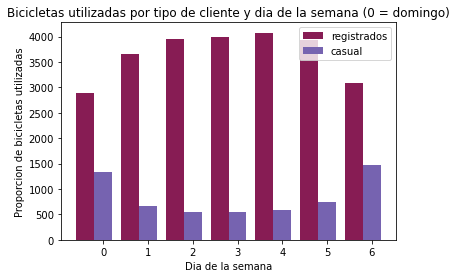

In [21]:
# Ejemplo con el número medio de bicicletas utilizadas por día de semana y tipo de cliente


# Datos a utilizar
x_data = mean_by_reg_co_day.index.values
y_data_list = [mean_by_reg_co_day['registered'], mean_by_reg_co_day['casual']]
y_data_names = ['registrados', 'casual']
# también se puede indicar el color en formato RGB
colors = [(0.53,0.11,0.33), '#7663b0']


_, ax = plt.subplots()
# Ancho fijo de barra
total_width = 0.8
# Grosor de cada una de las barras 
ind_width = total_width / len(y_data_list)
# Centramos ambas barras alrededor del tick del eje x correspondiente
alteration = np.arange(-(total_width/2), total_width/2, ind_width)

# Draw bars, one category at a time
for i in range(0, len(y_data_list)):
    # Move the bar to the right on the x-axis so it doesn't
    # overlap with previously drawn ones
    ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
ax.set_ylabel('Proporcion de bicicletas utilizadas')
ax.set_xlabel('Dia de la semana')
ax.set_title('Bicicletas utilizadas por tipo de cliente y dia de la semana (0 = domingo)')
ax.legend(loc = 'upper right')
plt.show()

### Boxplots

 Especialmente útiles para representar la distribución de una variable sobre distintas categorías

In [22]:
import numpy as np

In [23]:
days = np.unique(data["weekday"])
bp_data = []

for day in days:
    bp_data.append(data[data["weekday"] == day]["cnt"].values)

In [24]:
bp_data

[array([ 801,  822, 1204,  986, 1096, 1623, 1589, 1812, 2402,  605, 2417,
        2471, 1693, 3249, 2895, 3744, 4191, 3351, 4333, 4553, 4660, 4788,
        4906, 4460, 4744, 5305, 4649, 4881, 5302, 3606, 4302, 3785, 3820,
        3873, 4334, 4940, 5046, 4274, 5010, 2918, 5511, 5041, 4381, 3331,
        3649, 3717, 3520, 3071, 3485, 2743, 2431,  754, 2294, 3425, 2311,
        1977, 3243, 2947, 1529, 2689, 3389, 3423, 4911, 5892, 4996, 6041,
        5169, 7132, 1027, 6304, 6359, 6118, 7129, 6591, 7641, 6598, 6978,
        6891, 5531, 4672, 6031, 7410, 6597, 5464, 6544, 4549, 5255, 5810,
        8227, 7333, 7907, 6889, 3510, 6639, 6824, 4459, 5107, 6852, 4669,
        2424, 4649, 3228, 3786, 1787, 1796]),
 array([1349, 1321, 1000, 1416, 1501, 1712, 1913, 1107, 1446, 1872, 2046,
        2077, 2028, 3115, 3348, 3429, 4073, 4401, 4362, 3958, 4274, 4098,
        4548, 5020, 4010, 4708, 6043, 4086, 4458, 3840, 4266, 4326, 4338,
        4758, 4634, 3351, 4713, 4539, 4630, 3570, 5117, 4570, 4187

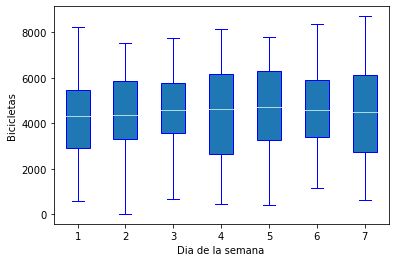

In [25]:
plt.boxplot(bp_data, medianprops= {"color" :"lightblue"},
           boxprops= {"color": "blue"},
           whiskerprops = {"color": "blue"},
           capprops={"color": "blue"},
           patch_artist=True)
plt.xlabel("Dia de la semana")
plt.ylabel("Bicicletas")
plt.show()

In [26]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f